<a href="https://colab.research.google.com/github/tubagusibrohim/Klasifikasi-dan-klustering-prediksi-pembelian-kendaraan/blob/main/Tubes_Pribadi_Malin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : **Tubagus Ibrohim A**

NIM  : 1301174655


# Tugas besar Pembelajaran Mesin Tahap Pertama (Personal)

Pada notebook ini saya akan menggunakan Dataset Kendaraan untuk membuat model dengan tujuan memprediksi apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak berdasarkan data pelanggan di dealer.

Pertama saya akan menggunakan library basic yaitu Pandas dan NumPy dan melakukan sedikit konfigurasi pada library tersebut.

In [ ]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')
sns.set(rc={'figure.facecolor':'white'})
sns.set_palette('Accent')

##Loading Data
Tahap pertama yang dilakukan adalah meload dataset yang sudah saya upload pada GitHub saya untuk mempermudah prosesnya. 

Dibawah ini merupakan list dari column pada dataset :

SIM	--> 0 : Tidak punya SIM 1 : Punya SIM

Kode_Daerah --> Kode area tempat tinggal pelanggan

Sudah_Asuransi --> 1 : Pelanggan sudah memiliki asuransi kendaraan, 0 : Pelanggan belum memiliki asuransi kendaraan

Umur_Kendaraan --> Umur kendaraan

Kendaraan_Rusak --> 1 : Kendaraan pernah rusak sebelumnya. 0 : Kendaraan belum pernah rusak.

Premi --> Jumlah premi yang harus dibayarkan per tahun.

Kanal_Penjualan --> Kode kanal untuk menghubungi pelanggan (email, telpon, dll)

Lama_Berlangganan	--> Sudah berapa lama pelanggan menjadi klien perusahaan

Tertarik --> 1 : Pelanggan tertarik, 0 : Pelanggan tidak tertarik



In [ ]:
df = (pd.read_csv('https://raw.githubusercontent.com/tubagusibrohim/Klasifikasi-dan-klustering-prediksi-pembelian-kendaraan/main/kendaraan_test.csv'))
 
print('Shape of dataframe:', df.shape)
df.head()

NameError: ignored

##Preprocessing Data
Sebelum kita membuat modelnya kita harus memproses data terlebih dahulu dan memastikan bahwa data yang digunakan merupakan data yang bagus untuk pembuatan model.

###Checking Missing Value

In [ ]:
df.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

berdasarkan hasil pengecekan data yang digunakan tidak memiliki missing value yang artinya data sudah bagus.

###Scale data numerik
Masuk ke tahap prosesing berikutnya , kita akan melakukan scale pada data numerik untuk menghindara adanya outlier yang dapat berefek kepada model yang akan dibuat. Dengan menggunakan fungsi StandardScaler() pada library sklear kita dapat melakukan skalasi pada tiap kolom yang mengandung data numerik

In [ ]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_ready = df.copy().drop(['Kode_Daerah','Kanal_Penjualan'],axis=1)

scaler = StandardScaler()
num_cols = ['Umur', 'Premi', 'Lama_Berlangganan']
df_ready[num_cols] = scaler.fit_transform(df_ready[num_cols])

df_ready.head()

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik
0,Wanita,0.655011,1,0,1-2 Tahun,Pernah,0.938632,-0.112954,0
1,Pria,-1.081474,1,1,< 1 Tahun,Tidak,0.516962,1.034805,0
2,Pria,-0.952846,1,1,< 1 Tahun,Tidak,4.588010,-1.105287,0
3,Pria,0.462068,1,1,1-2 Tahun,Tidak,0.324024,-1.440050,0
4,Pria,-0.245389,1,0,1-2 Tahun,Pernah,-0.210489,0.891336,0


###Encode Data Kategorikal
Sama seperti pada data numerik , kita juga harus memproses data kategorikal dari kata(string) ke angka untuk memudahkan komputer memahaminya. Untuk meng encode data kategorikal disina saya akan menggunakan fungsi OneHotEncoder() yang disediakan oleh library sklearn.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
cat_cols = ['Jenis_Kelamin','Umur_Kendaraan','Kendaraan_Rusak']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_ready[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

# Replace Categotical Data with Encoded Data
df_ready = df_ready.drop(cat_cols ,axis=1)
df_ready = pd.concat([df_encoded, df_ready], axis=1)

print('Shape of dataframe:', df_ready.shape)
df_ready.head()

Shape of dataframe: (47639, 13)


,Jenis_Kelamin_Pria,Jenis_Kelamin_Wanita,Umur_Kendaraan_1-2 Tahun,Umur_Kendaraan_< 1 Tahun,Umur_Kendaraan_> 2 Tahun,Kendaraan_Rusak_Pernah,Kendaraan_Rusak_Tidak,Umur,SIM,Sudah_Asuransi,Premi,Lama_Berlangganan,Tertarik
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.655011,1,0,0.938632,-0.112954,0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.081474,1,1,0.516962,1.034805,0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.952846,1,1,4.588010,-1.105287,0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.462068,1,1,0.324024,-1.440050,0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.245389,1,0,-0.210489,0.891336,0


In [ ]:
df_ready.to_csv('data_after_preprocess.csv', index=False)

##Eksplorasi Data
Sebelum membuat model saya melakukan ekplorasi data yang bertujuan untuk memahami data lebih baik dan dapat membantu untuk menentukan feature yang digunakan pada model yang akan dibuat.

Disini saya akan menampilkan relasi antar tiap kolom dengan menggunakan fungsi pairplot() dari library Seaborn untuk membuat histogram.

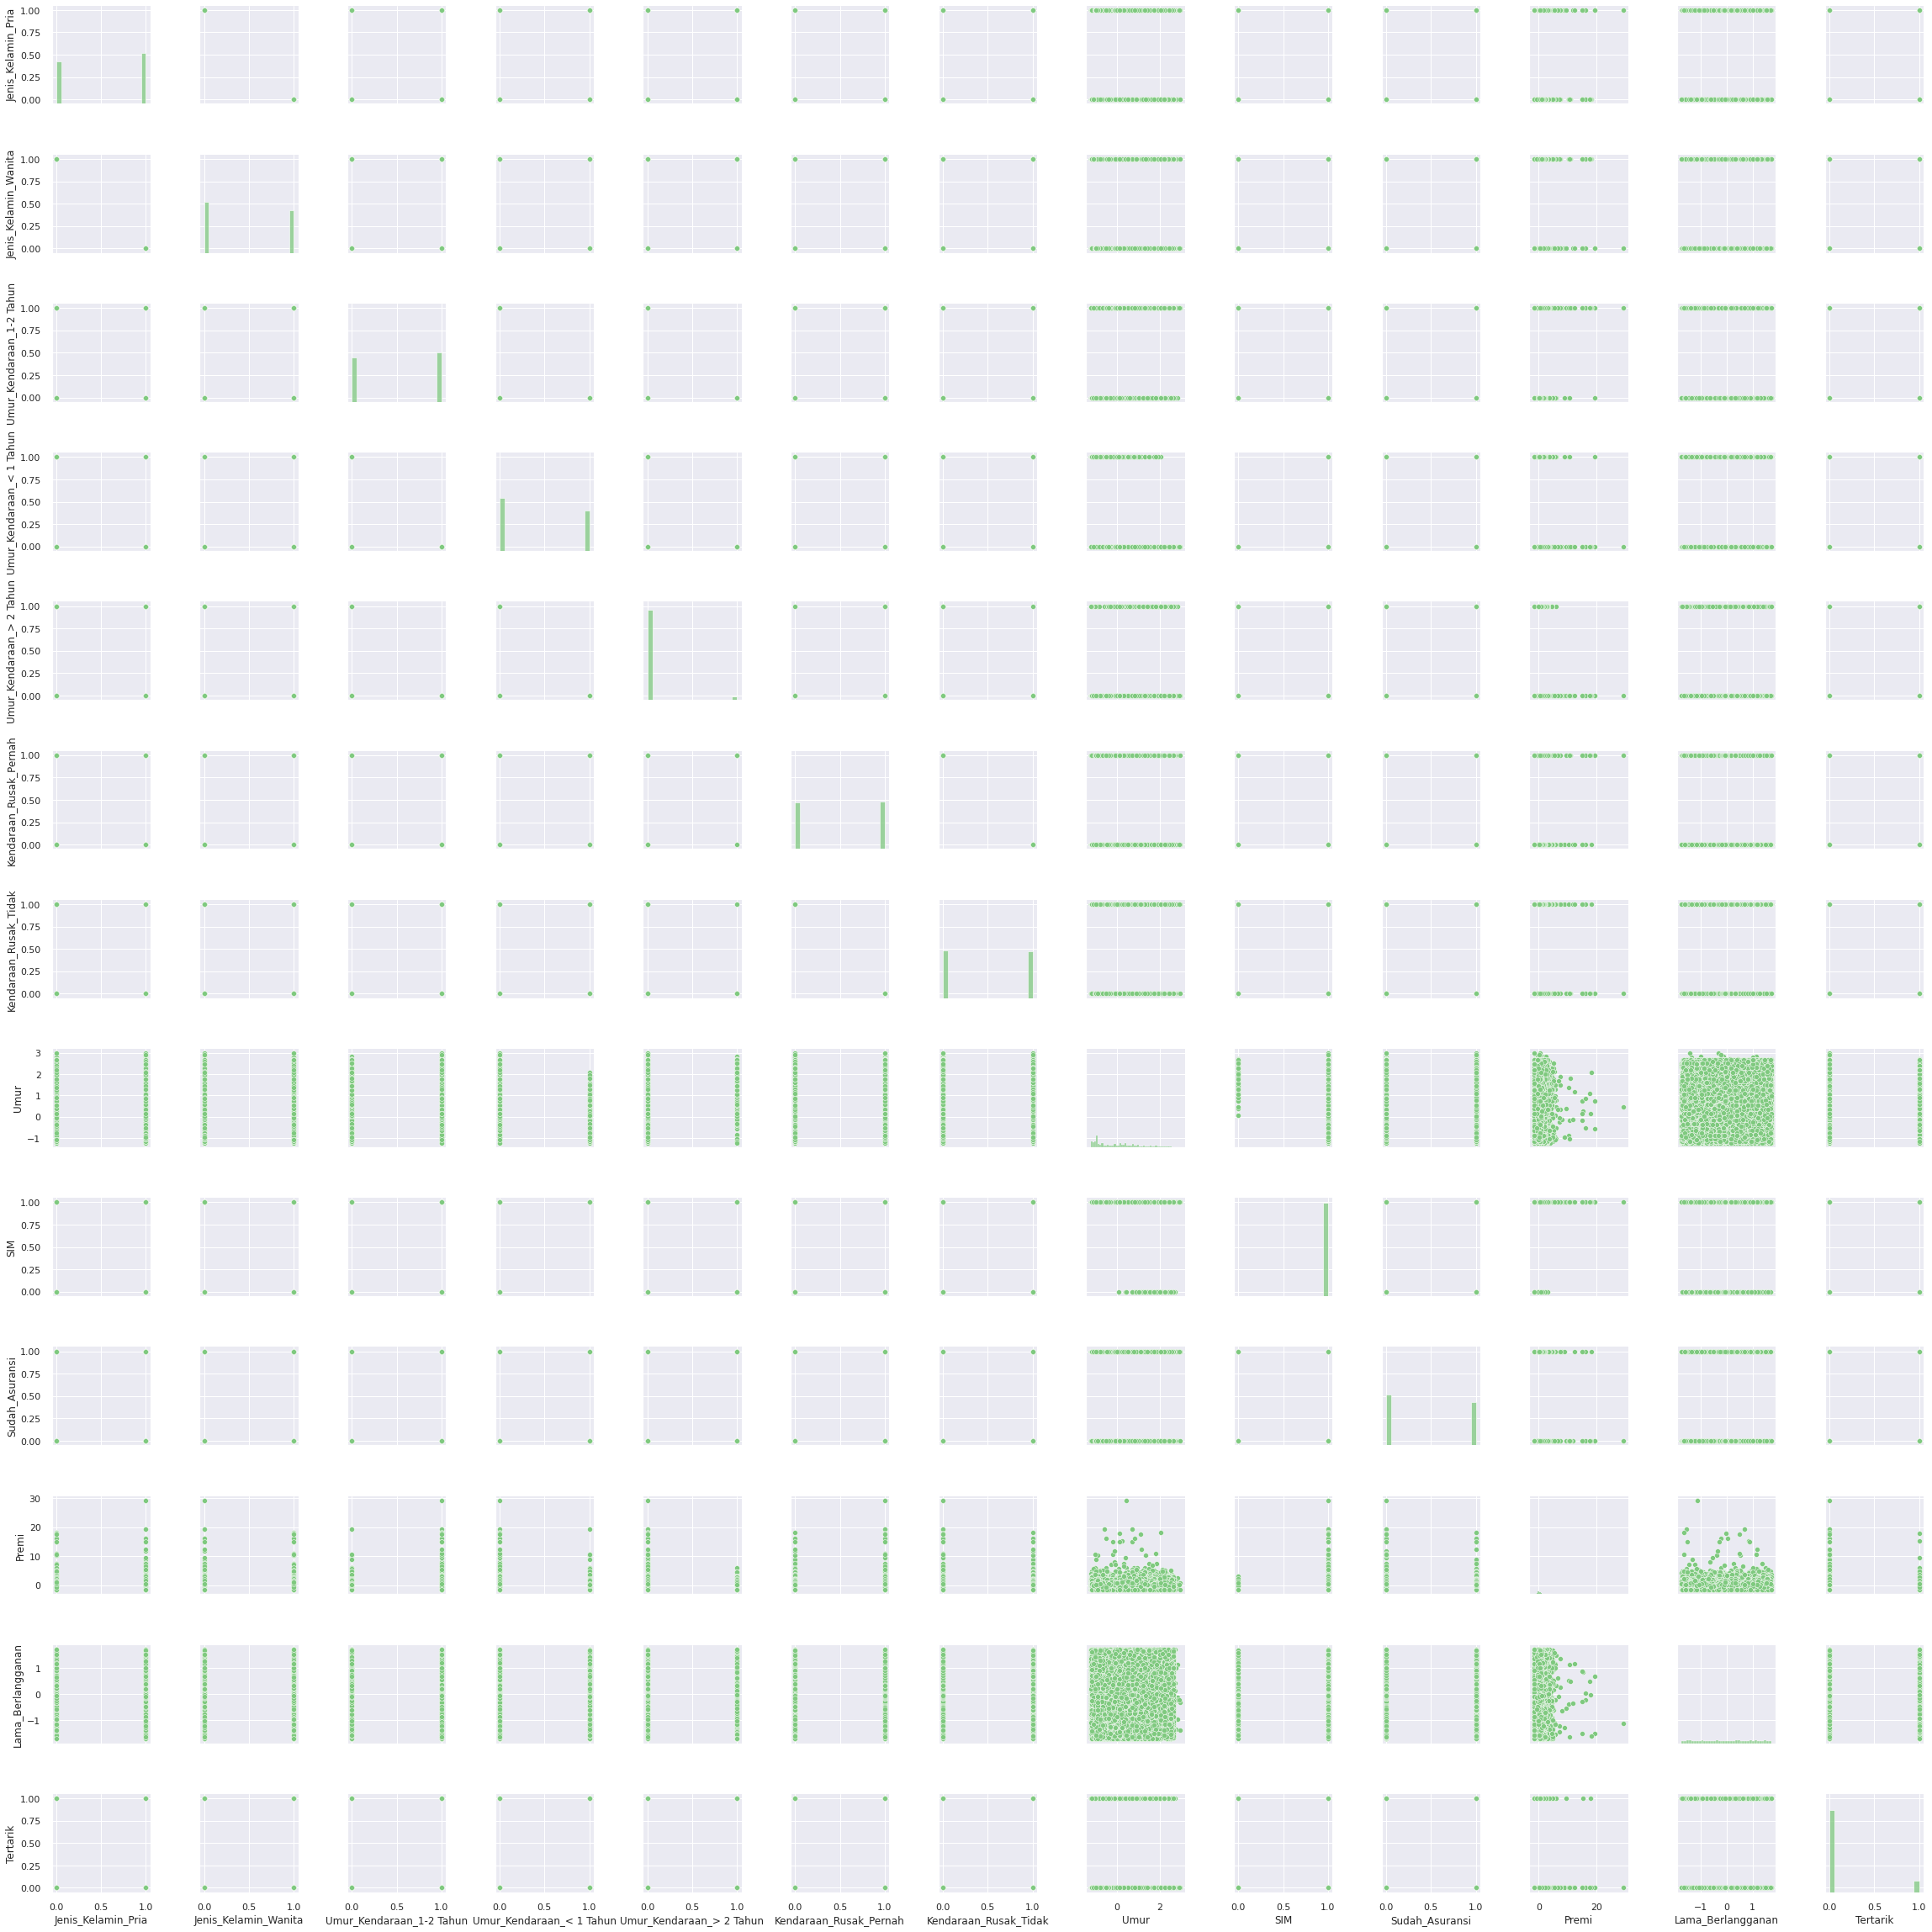

In [ ]:
# Draw pair plot of scatter and histogram
sns.pairplot(data=df_ready)

# Classification

##Split Dataset untuk Training dan Testing
Pada tahap ini kita akan melakukan split data degan rasio 60:40.*Secara random saja tidak ada acuan splitnya

In [ ]:
# Select Features
feature_class = df_ready.drop('Tertarik', axis=1)

# Select Target
target_class = df_ready['Tertarik']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_class , target_class, 
                                                    shuffle = True, 
                                                    test_size=0.4, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape training X :', X_train.shape)
print('Shape training Y :', y_train.shape)

print('Shape testing X:', X_test.shape)
print('Shape of training label:', y_test.shape)

Shape training X : (28583, 12)
Shape training Y : (28583,)
Shape testing X: (19056, 12)
Shape of training label: (19056,)


##Modeling
Setelah memastikan data sudah sesuai kita akan membuat model.

Untuk mengevaluasi model kita akan menggunakan confusion matrix, dengan 6 metrics perhitungan :
  1. Accuracy : jumlah true dari total 
  2. Precision : Menghitung proporsi dari semua data yang di prediksi benar ternyata memang benar
  3. Recall : untuk menghitung proporsi dari hasil klasifikasi
  4. F1 Score : angka antara 0 dan 1 yang berarti precision dan recall
  5. Cohen Kappa Score
  6. AUC Arean Under Curve

Pada kasus ini kita akan berfokus pada value dari recall karena permasalahanya kita harus dapat memprediksi sebanyak mungkin yang tertarik untuk membeli.


###Naive Bayes Modeling
Naive Bayes adalah teknik sederhana untuk membangun pengklasifikasi: model yang menetapkan label kelas ke instance masalah, direpresentasikan sebagai vektor nilai fitur, di mana label kelas diambil dari beberapa himpunan. Naive Bayes berasumsi bahwa nilai fitur tertentu tidak bergantung pada nilai fitur lainnya, tergantung variabel kelas.

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

###Random Forest Modeling
Random forest atau Random Decision Forest adalah metode yang beroperasi dengan membangun beberapa pohon keputusan selama fase pelatihan. Keputusan mayoritas pohon dipilih sebagai keputusan akhir.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

###Evaluasi Model yang telah dibuat

In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

####Naive Bayes Model

In [ ]:
nb_eval = evaluate_model(nb, X_test, y_test)

print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.6406905961376994
Precision: 0.25057979017117615
Recall: 0.9738197424892704
F1 Score: 0.39859464207290296
Cohens Kappa Score: 0.25338049692754927
Area Under Curve: 0.816688122472838
Confusion Matrix:
 [[9940 6786]
 [  61 2269]]


###Random Forest Model

In [ ]:
rf_eval = evaluate_model(rf, X_test, y_test)

print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.8589945424013434
Precision: 0.320962888665998
Recall: 0.13733905579399142
F1 Score: 0.1923654944394349
Cohens Kappa Score: 0.12850037407265635
Area Under Curve: 0.8132947907167223
Confusion Matrix:
 [[16049   677]
 [ 2010   320]]


###Perbandingan Model
Setelah mengevaluasi model , model nb dan model rf akan dibandingkan performansinya. Disini saya akan menggunakan chart untuk menampilkan perbandingan kedua model

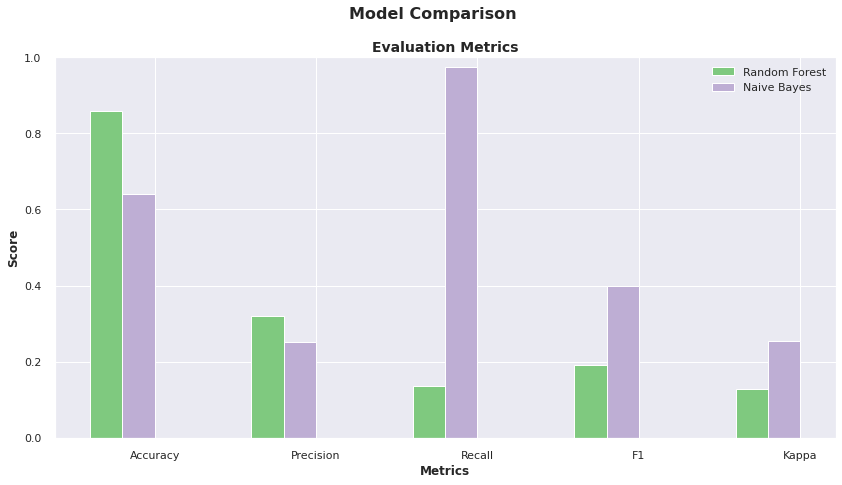

In [ ]:
# Intitialize figure with two plots
fig, (ax1) = plt.subplots(1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]


## Make the plot
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r2, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(rf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

plt.show()

Dari chart diatas dapat dilihat Model Naive Bayes memiliki nilai Recall yang lebih tinggi daripada Model Random forest.

###Prediction

In [ ]:
df_classification = df.copy()
df_classification['Prediksi Pelanggan Tertarik'] = nb.predict(feature_class)
df_classification['Prediksi Pelanggan Tertarik'] = df_classification['Prediksi Pelanggan Tertarik'].apply(lambda x: 'Tertarik' if x==0 else 'Tidak')

# Save new dataframe into csv file
#df_classification.to_csv('kendaraan_prediction.csv', index=False)

df_classification.head(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Prediksi Pelanggan Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0,Tidak
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0,Tertarik
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0,Tertarik
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0,Tertarik
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0,Tidak
5,Pria,26,1,28,1,< 1 Tahun,Tidak,42721,152,198,0,Tertarik
6,Wanita,24,1,28,1,< 1 Tahun,Tidak,65801,152,160,0,Tertarik
7,Wanita,40,1,28,0,1-2 Tahun,Pernah,30981,26,79,0,Tidak
8,Pria,23,1,15,1,< 1 Tahun,Tidak,32365,152,219,0,Tertarik
9,Wanita,43,1,28,0,1-2 Tahun,Pernah,65380,25,41,1,Tidak


In [ ]:
df_classification['Prediksi Pelanggan Tertarik'].value_counts()

Tertarik    24895
Tidak       22744
Name: Prediksi Pelanggan Tertarik, dtype: int64

#Clustering

##Feature Selection
Dengan menggunakan fungsi PCA pada sklearn kita dapat menentukan Principal component dari dataset yang telah di proses sebelumnya

In [ ]:
feature_clus = df_ready[['Umur','Premi','Lama_Berlangganan']]

In [ ]:
#proses pemanggilan library yang akan digunakan
from sklearn.decomposition import PCA

#proses pemanggilan library dan inisiasi dimensi = 2
pca_val = PCA(n_components=2)

#proses mentransformasikan data 
principalComponents = pca_val.fit_transform(feature_clus)

#proses menyimpan data pada sebuah atribut
df_pca = pd.DataFrame(data = principalComponents, columns = ['PCA 1', 'PCA 2'])

In [ ]:
df_pca.head(10)

,PCA 1,PCA 2
0,1.132278,-0.039211
1,-0.470253,0.966621
2,2.646857,-1.046930
3,0.656463,-1.393071
4,-0.384725,0.864957
5,-0.126902,0.477733
6,0.751095,0.051421
7,0.132025,-0.893165
8,-0.700801,0.697765
9,1.695807,-1.278292


##Modeling 

###Data Combine
Dari data PCA yang telah dibuat , data tersebut akan dijadikan list dengan isi penggabungan 1 row antara PCA 1 dan PCA 2 

In [ ]:
pca_encoded = []

#looping untuk berpindah dari satu kolom ke kolom lainnya
for i in range(0,len(df_pca.columns)):
    
    #proses memasukkan kolom ke dalam list yang sudah dibuat
    pca_encoded.append(df_pca[df_pca.columns[i]])    

#proses menggabungkan atribut-atribut ke dalam satu list
df_clus = list(zip(*pca_encoded))

In [ ]:
print(df_clus)

[(1.1322779259040352, -0.039211046822096), (-0.4702528634937269, 0.9666208067862363), (2.6468573346744138, -1.0469302052438192), (0.6564632769364931, -1.3930711202833557), (-0.38472509178913117, 0.8649574056159898), (-0.1269020886939364, 0.4777325660951234), (0.7510954399773869, 0.05142147071625491), (0.1320248798778901, -0.8931652475658952), (-0.7008006920846573, 0.697764544871542), (1.6958070468471749, -1.2782923440790672), (2.758862780888556, -1.3392676425923122), (-0.6734884672075081, -0.3142618511127994), (-0.3594279984485895, -1.4853117767563393), (-0.9369907658399153, 1.0413183812606008), (-0.5560957159539806, 0.8945648274389362), (-1.8909944636298464, -0.859904742193598), (-0.25581967931271027, 0.7716875789459505), (-0.39838187879722436, 1.2562346834178613), (0.6901263659047541, -1.6667873435799072), (1.8109754962195814, -1.5461434486094159), (1.4438456378435904, -1.4920928869579202), (0.9823914538913958, 0.465883898810083), (-0.19284972254708807, -0.3704389443399965), (0.74732

###Membuat fungsi modeling
Karena tidak diperbolehkan menggunakan library , disini saya akan membuat fungsi dari model clustering secara manual

In [ ]:
def nilai_centroid (k,data):
  #proses inisiasi nilai awal centroid
  c = []
  for i in range (0,k):
    x = []
    for j in range (0,len(data[i])):
      x.append(random.uniform(0.0,10.0))
    c.append(x)

  #proses konversi nilai centroid menjadi float yang memiliki dua angka dibelakang koma
  centroid = []
  for i in range (0,len(c)):
    centroid.append([round(num,2) for num in c[i]])

  return centroid

fungsi nilai_centroid() berfungsi untuk menentukan nilai dari centroid dengan parameter k sebagai jumlah centroid

In [ ]:
def euclidean_dist(c,d):
  x = []
  for i in range(0,len(c)):
    x.append((c[i]-d[i])**2)
  
  nilai_sum = sum(x)
  dist = nilai_sum**(1/2)

  return dist

fungsi euclidean_dist berfungsi untuk menghitung ditance antara data nilai centroid

In [ ]:
def nilai_distance(c,d):
  dist_centroid = []
  for i in range (0,len(d)):
    nilai_centroid = []
    for j in range (0,len(c)):

      #memanggil fungsi euclidean_dist untuk melakukan proses perhitungan distance anatar data dengan cluster
      dist = euclidean_dist(c[j],d[i])
      
      nilai_centroid.append(dist)
    dist_centroid.append(nilai_centroid)

  return dist_centroid

fungsi nilai_distance berfungsi untuk mendapatkan nilai distance pada masing-masing data dan nilai centroid yang sudah didefinisikan

In [ ]:
def combine_data(data,close_centroid):
  data_combine = []
  for i in range(0,len(data)):
    
    #proses konversi data[i] dari tuple ke list agar bisa memasukkan label pada baris data tersebut
    a = list(data[i])

    #proses memasukkan data label ke dalam sebuah list
    a.append(close_centroid[i])
    
    #proses menggabungkan data dengan label cluster dari masing-masing data
    data_combine.append(a)
  
  return data_combine

fungsi data_combine() berfungsi untuk menggabungkan data label cluster kedalam list yang sama

In [ ]:
def sortkey(val): 
    return val[2] 

In [ ]:
def posisi_cluster(centroid,data):
  
  #proses pemanggilan fungsi nilai_distance untuk mendapatkan nilai distance antara data dengan cluster
  dist_centroid = nilai_distance(centroid,data)

  #proses untuk mengetahui suatu data masuk ke kelompok cluster yang mana
  close_centroid = []
  for i in range (0,len(dist_centroid)):
    
    #proses mengetahui suatu data masuk ke kelompok cluster yang mana dengan membandingkan tiap nilai pada cluster yang tersedia dan mengambil nilai distance terkecil
    close_dist = dist_centroid[i].index(min(dist_centroid[i]))

    #proses memasukkan label cluster ke dalam sebuah variabel
    close_centroid.append(close_dist) 
  
  #proses memanggil fungsi combine_data untuk menggabungkan list data dengan list label
  data_combine = combine_data(data,close_centroid)

  #proses sorting data dengan patokan data label
  data_combine.sort(key=sortkey)

  return data_combine

fungsi posisi_cluster() berfungsi untuk memproses distance serta hasil kombinasi kemudia di sorting untuk perhitungan rata rata

In [ ]:
def total_jml_centroid(data_combine):
  i = 0
  idx = 0
  jml_centroid = []
  out = False

  while out == False:
    if i == len(data_combine)-1:
      idx = idx + 1
      jml_centroid.append(idx)
      out = True
    else:
      if data_combine[i][2] == data_combine[i+1][2]:
        idx = idx + 1
        i = i + 1
      else:
        idx = idx + 1
        jml_centroid.append(idx)
        idx = 0
        i = i + 1  

  return jml_centroid

fungsi total_jml_centroid() berfungsi untuk menyimpan jumlah data pada masing masing cluster

In [ ]:
def sum_data_cluster(data_combine, jml_centroid):
  a = 0
  b = jml_centroid[0]
  sum_data1 = 0
  sum_data2 = 0
  sum1 = []
  sum2 = []

  #proses sum atau menghitung jumlah total dari data PCA1 dan PCA2 sesuai dengan label cluster dari data tersebut 
  for i in range(0,len(jml_centroid)):
    
    #proses penjumlahan
    for j in range (a, b):
      sum_data1 = sum_data1 + data_combine[j][0]
      sum_data2 = sum_data2 + data_combine[j][1]
    sum1.append(sum_data1)
    sum2.append(sum_data2)
    sum_data1 = 0
    sum_data2 = 0

    #jika proses iterasi sudah mencapa akhir data maka proses looping di break atau dihentikan
    if i == len(jml_centroid)-1:
      break
    else:
      a = b
      b = a + jml_centroid[i+1] 

  return sum1,sum2

fungsi sum_data_cluster berfungsi untuk menghitung jumlah PCA 1 dan PCA 2 dengan label cluster

In [ ]:
def update_centroid(centroid):
  
  #proses pemanggilan fungsi sum atau penjumlahan total dari data PCA1 dan PCA2 sesuai dengan label cluster dari data tersebut
  sum1,sum2 = sum_data_cluster(data_combine, jml_centroid)
  centroid = []
  temp = []
  new_nilai1 = 0
  new_nilai2 = 0

  #proses menghitung rata-rata tiap cluster dengan menggunakan nilai sum dan jumlah total dari tiap cluster
  for i in range (0,len(jml_centroid)):
    new_nilai1 = sum1[i]/jml_centroid[i]
    new_nilai2 = sum2[i]/jml_centroid[i]
    temp.append(round(new_nilai1,2))
    temp.append(round(new_nilai2,2))

    #proses memasukkan nilai rata-rata ke dalam variabel centroid
    centroid.append(temp)
    temp = []
    new_nilai1 = 0
    new_nilai2 = 0

  return centroid

fungsi update_centroid berfungsi untuk mengupdate 
nilai cluster yang sudah dihitung rata ratanya.

###Modeling berdasarkan fungsi yang sudah dibuat

In [ ]:
#inisiasi nilai k atau jumlah centroid
k = 4

#proses pemanggilan fungsi nilai_centroid untuk mendapatkan nilai awal dari masing-masing centroid
centroid = nilai_centroid (k,df_clus)

for i in range(0,len(centroid)):
  print('nilai centroid ',i+1,' = ',centroid[i])
first_centroid = centroid

nilai centroid  1  =  [4.44, 1.48]
nilai centroid  2  =  [7.32, 4.69]
nilai centroid  3  =  [1.06, 2.34]
nilai centroid  4  =  [6.79, 6.06]


selanjutnya saya memasukkan nilai centroid lama ke dalam sebuah vaiabel agar bisa di bandingkan di setiap akhir iterasi untuk menentukan apakah proses iterasi dilanjutkan atau tidak. Iterasi selesai jika nilai centroid baru memiliki nilai yang sama dengan nilai proses yang lama. Tujuan dari proses ini adalah agar proses pemodelan nya bisa dilakukan dengan cepat karena jika nilai centroid baru sudah sama dengan nilai centroid yang lama, maka nilai centroid selanjutnya juga akan sama seterusnya

In [ ]:
out = False
j = 0

while out == False:
  old_centroid = centroid
  
  #output nilai lama centroid
  print('iterasi ke-',j+1)
  print('centroid lama')
  for i in range(len(old_centroid)):
    print('old centroid ',old_centroid[i])
  print()
  
  #proses memanggil fungsi-fungsi untuk melakukan proses pemodelan k means clustering
  data_combine = posisi_cluster(centroid,df_clus)
  jml_centroid = total_jml_centroid(data_combine)
  centroid = update_centroid(centroid)

  #output nilai baru centroid
  print('centroid baru')
  for i in range(len(centroid)):
    print('new centroid ',i+1,' = ',centroid[i])

  print()

  #proses pengecekan apakah nilai centroid baru sudah sama dengan nilai centroid lama
  j = j + 1
  for i in range(0,1):
    if old_centroid[i][0] == centroid[i][0] and old_centroid[i][1] == centroid[i][1]:
      out = True
    else:
      out = False

#output nilai centroid final
print('-----------------------------------------')
print('centroid final')
for i in range(0,len(centroid)):
  print('nilai final centroid ',i+1,' = ',centroid[i])
print()
print('jumlah total iterasi yang dilakukan = ',j)

iterasi ke- 1
centroid lama
old centroid  [4.44, 1.48]
old centroid  [7.32, 4.69]
old centroid  [1.06, 2.34]
old centroid  [6.79, 6.06]

centroid baru
new centroid  1  =  [2.7, -0.42]
new centroid  2  =  [12.4, 0.38]
new centroid  3  =  [-0.07, 0.01]

iterasi ke- 2
centroid lama
old centroid  [2.7, -0.42]
old centroid  [12.4, 0.38]
old centroid  [-0.07, 0.01]

centroid baru
new centroid  1  =  [1.9, -0.18]
new centroid  2  =  [11.88, 0.39]
new centroid  3  =  [-0.24, 0.02]

iterasi ke- 3
centroid lama
old centroid  [1.9, -0.18]
old centroid  [11.88, 0.39]
old centroid  [-0.24, 0.02]

centroid baru
new centroid  1  =  [1.52, -0.07]
new centroid  2  =  [11.35, 0.41]
new centroid  3  =  [-0.4, 0.02]

iterasi ke- 4
centroid lama
old centroid  [1.52, -0.07]
old centroid  [11.35, 0.41]
old centroid  [-0.4, 0.02]

centroid baru
new centroid  1  =  [1.31, -0.03]
new centroid  2  =  [10.69, 0.3]
new centroid  3  =  [-0.5, 0.01]

iterasi ke- 5
centroid lama
old centroid  [1.31, -0.03]
old centro

In [ ]:
Final_Clus = pd.DataFrame(data = data_combine, columns = ['PCA 1', 'PCA 2', 'Cluster'] )

###Visualisasi Hasil

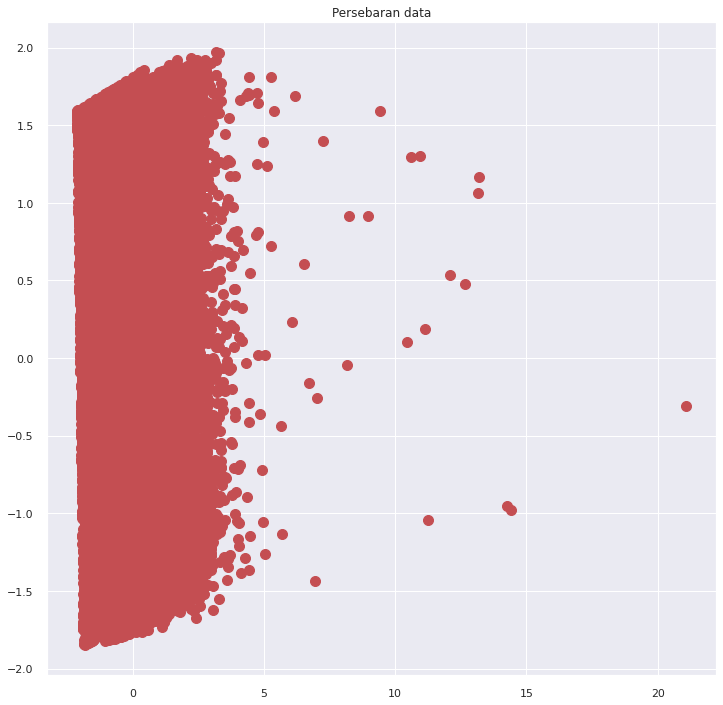

In [ ]:
plt.figure(figsize = (12,12))
plt.scatter(Final_Clus['PCA 1'], Final_Clus['PCA 2'], s = 100, c = 'r', marker = 'o', alpha = 1, )
plt.title('Persebaran data')
plt.show()

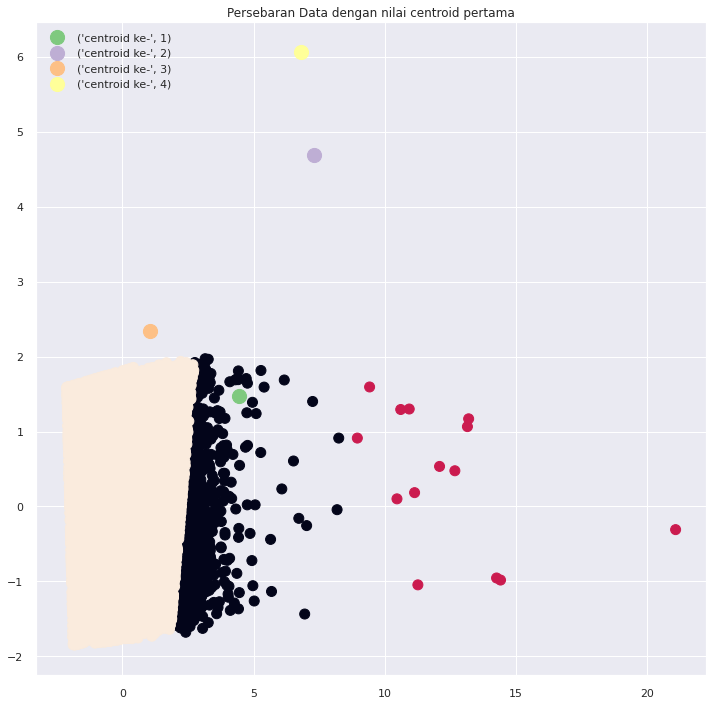

In [ ]:
data_combine = posisi_cluster(first_centroid,df_clus)

data = pd.DataFrame(data_combine, columns = ['PCA 1', 'PCA 2', 'Cluster'])

plt.figure(figsize = (12,12))
plt.scatter(data['PCA 1'], data['PCA 2'], s = 100, c = data['Cluster'], marker = 'o', alpha = 1, )
centers = pd.DataFrame(data = first_centroid, columns = ['c1', 'c2'])
for i in range(0,len(centers)):
  a = 'centroid ke-',i+1
  plt.scatter(centers['c1'][i], centers['c2'][i], s=200, alpha=1 , marker='o',label= a);
plt.title('Persebaran Data dengan nilai centroid pertama')
plt.legend(loc="upper left")
plt.show()

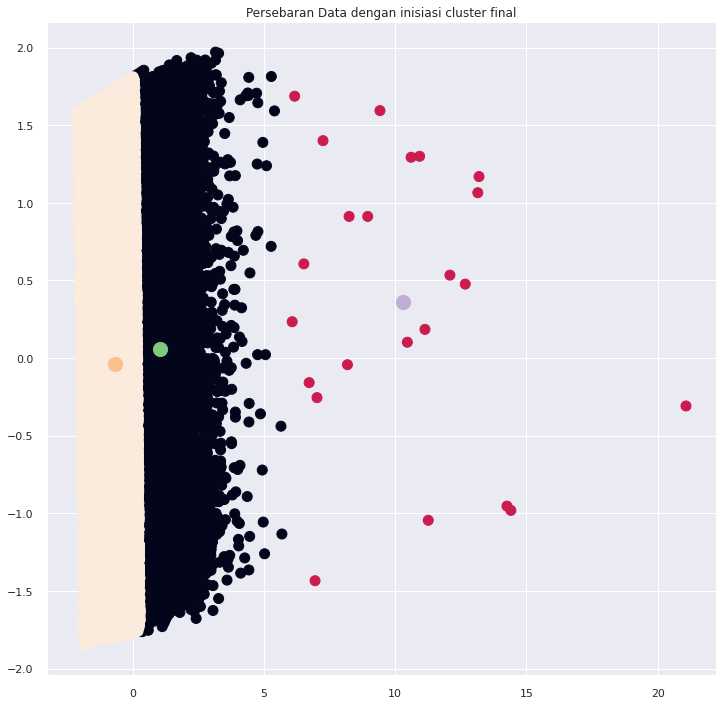

In [ ]:
plt.figure(figsize = (12,12))
plt.scatter(Final_Clus['PCA 1'], Final_Clus['PCA 2'], s = 100, c = Final_Clus['Cluster'], marker = 'o', alpha = 1, )
centers = pd.DataFrame(data = centroid, columns = ['c1', 'c2'])
for i in range(0,len(centers)):
  a = 'centroid ke-',i+1
  plt.scatter(centers['c1'][i], centers['c2'][i], s=200, alpha=1 , marker='o', label= a);
plt.title('Persebaran Data dengan inisiasi cluster final')
plt.show()

####Mengapa k = 4? Uji dengan menggunakan library

In [ ]:
from sklearn.cluster import KMeans

distortions = []

#range jumlah centroid yang ingin diuji
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Final_Clus)
    distortions.append(kmeanModel.inertia_)

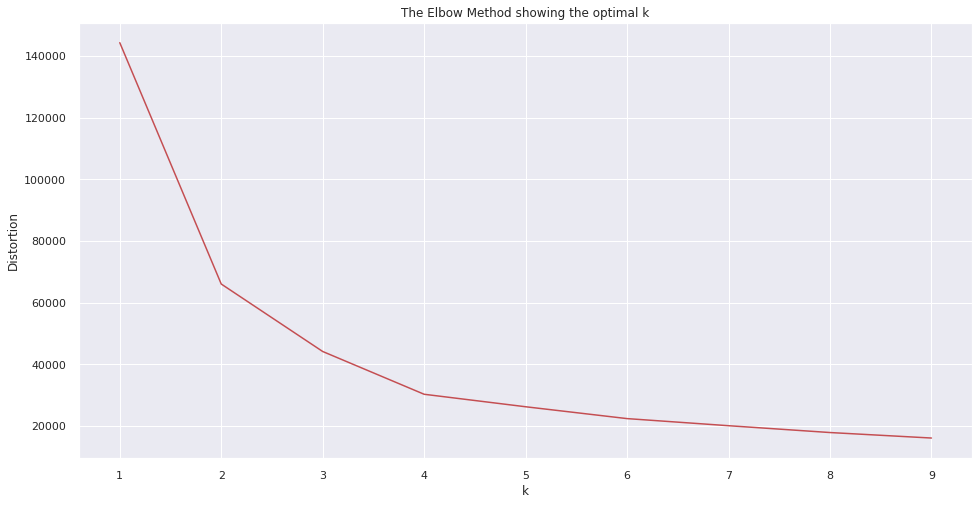

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions,c='r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

###Evaluasi Hasil Clustering

In [ ]:
from sklearn import metrics

# Fit K-Means Model to the Data
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=500, n_init=10, random_state=0)
km_cluster = kmeans.fit_predict(df_clus)

# Evaluate model
km_silhouette = metrics.silhouette_score(df_clus, km_cluster)

In [ ]:
print('Slhouette score of K-Means model:', km_silhouette)

Slhouette score of K-Means model: 0.3824689773178912


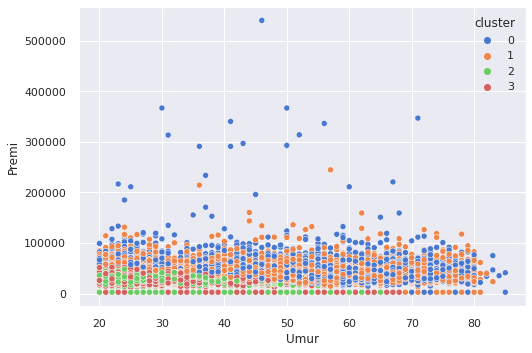

In [ ]:
sns.scatterplot(data=df_clustering, x='Umur', y='Premi', hue='cluster', palette='muted')

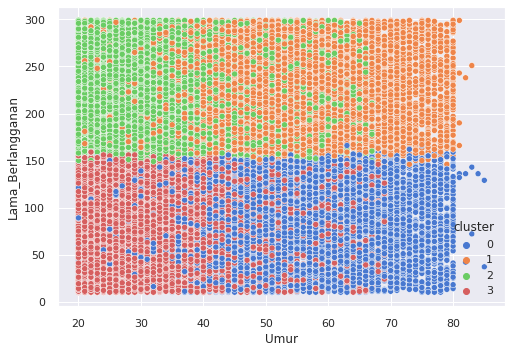

In [ ]:
sns.scatterplot(data=df_clustering, x='Umur', y='Lama_Berlangganan', hue='cluster', palette='muted')

| Cluster | Umur | Premi | Lama Berlangganan |
|:-:|:-:|:-:|:-:|
| 1 (Biru) | >20 | > 500.000 | < 150 |
| 2 (Orange) | >20 | < 250.000 | > 150 - 300-an |
| 3 (Hijau) | >20 | < 75.000 | > 150 - 300 |
| 4 (Merah) | >20 | < 50.000 | < 150 |

###Prediksi Berdasarkan Hasil Clustering
Berdasarkan hasil clustering yang telah dibuat makan kita akan memasukkan kolom baru pada dataset awal dengan nama cluster

In [ ]:
df_clustering = df

In [ ]:
df_clustering['cluster'] = km_cluster

In [ ]:
df_clustering.head(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,cluster
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0,2
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0,2
5,Pria,26,1,28,1,< 1 Tahun,Tidak,42721,152,198,0,2
6,Wanita,24,1,28,1,< 1 Tahun,Tidak,65801,152,160,0,1
7,Wanita,40,1,28,0,1-2 Tahun,Pernah,30981,26,79,0,3
8,Pria,23,1,15,1,< 1 Tahun,Tidak,32365,152,219,0,2
9,Wanita,43,1,28,0,1-2 Tahun,Pernah,65380,25,41,1,0


In [ ]:
df_clustering.to_csv('kendaraan_segmentation.csv', index=False)